In [37]:
%matplotlib inline

#You need the following modues, if you don't have them, use pip install <module-name>
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt


In [2]:
# Implicit Grant Flow
#Enter your OAuth token in place
#supposed to expire in 2021-03-27 - 12:40 PM - [GMT + 5:30 time zone]

access_token = "OAuth Token"

start_date = "2021-03-18"
end_date = "2021-03-22"


<h2>HR analysis</h2>

In [72]:
import datetime

#Update your start and end dates here in yyyy-mm-dd format 
start = datetime.datetime.strptime(start_date, "%Y-%m-%d")
end = datetime.datetime.strptime(end_date, "%Y-%m-%d")

date_array = (start + datetime.timedelta(days=x) for x in range(0, (end-start).days))

day_list = []
for date_object in date_array:
    day_list.append(date_object.strftime("%Y-%m-%d"))
    
print("day range : ",day_list)

day range :  ['2021-03-17', '2021-03-18', '2021-03-19', '2021-03-20', '2021-03-21', '2021-03-22']


In [6]:
df_all = pd.DataFrame()

In [37]:


header = {'Authorization': 'Bearer {}'.format(access_token)}

for single_day in day_list:
    response = requests.get("https://api.fitbit.com/1/user/-/activities/heart/date/"+ single_day +"/1d/1min/time/00:00/23:59.json", headers=header).json()
    df = pd.DataFrame(response['activities-heart-intraday']['dataset'])
    date = pd.Timestamp(single_day).strftime('%Y-%m-%d')
    df = df.set_index(pd.to_datetime(date + ' ' + df['time'].astype(str)))
    #print(df)
    df_all = df_all.append(df, sort=True)
    
del df_all['time']

In [38]:
#Put the interval you want to take the average of the imported data from fitbit with 2-5 sec interval. Default 10 minute
summary_df = (df_all['value'].resample('10Min').mean())

<AxesSubplot:xlabel='time'>

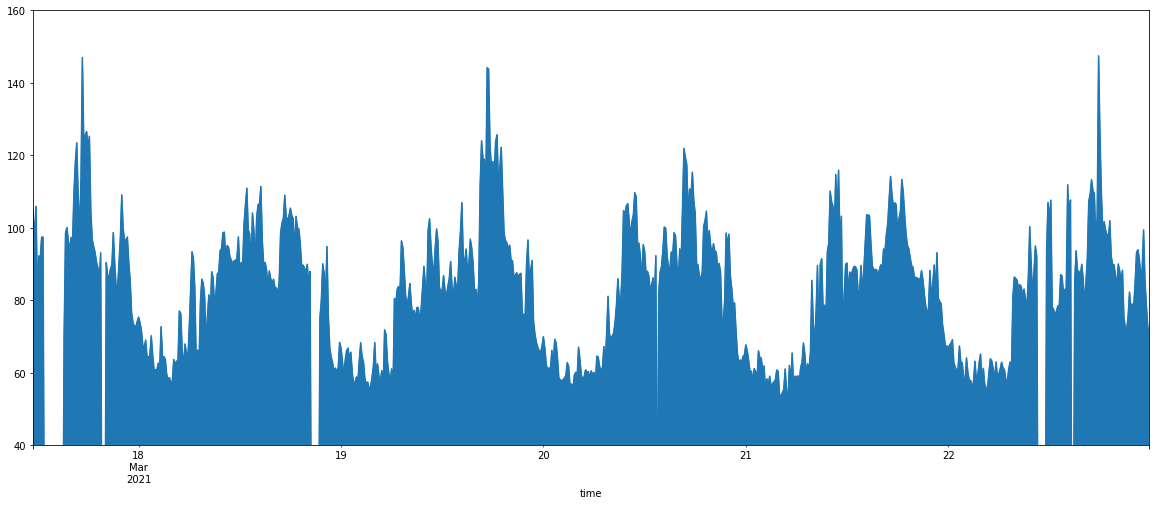

In [39]:
plt.rcParams["figure.figsize"]=20,8

# Heart rate data summary [10min avg] from start date[2021-03-18] to end date[2021-03-21] 
#if you are using matplotlib directly in python ( py file ) then use plt.plot(summary_df,kind='area')
summary_df.plot.area(ylim=(40,160))

<h2>Sleep analysis</h2>

In [77]:
header = {'Authorization': 'Bearer {}'.format(access_token)}

response = requests.get("https://api.fitbit.com/1.2/user/-/sleep/date/"+start_date+"/"+end_date+".json", headers=header).json()

In [78]:
combined_list = []
for i in range(len(response['sleep'])):
    result = response['sleep'][i]['levels']['summary']
    nice_dict = {'day':response['sleep'][i]['dateOfSleep'], 'deep_minutes':response['sleep'][i]['levels']['summary']['deep']['minutes'], 'light_minutes':response['sleep'][i]['levels']['summary']['light']['minutes'], 'rem_minutes':response['sleep'][i]['levels']['summary']['rem']['minutes'], 'wake_minutes':response['sleep'][i]['levels']['summary']['wake']['minutes']}
    combined_list.append(nice_dict)

In [79]:
sleep_df = pd.DataFrame(combined_list)

<AxesSubplot:xlabel='day'>

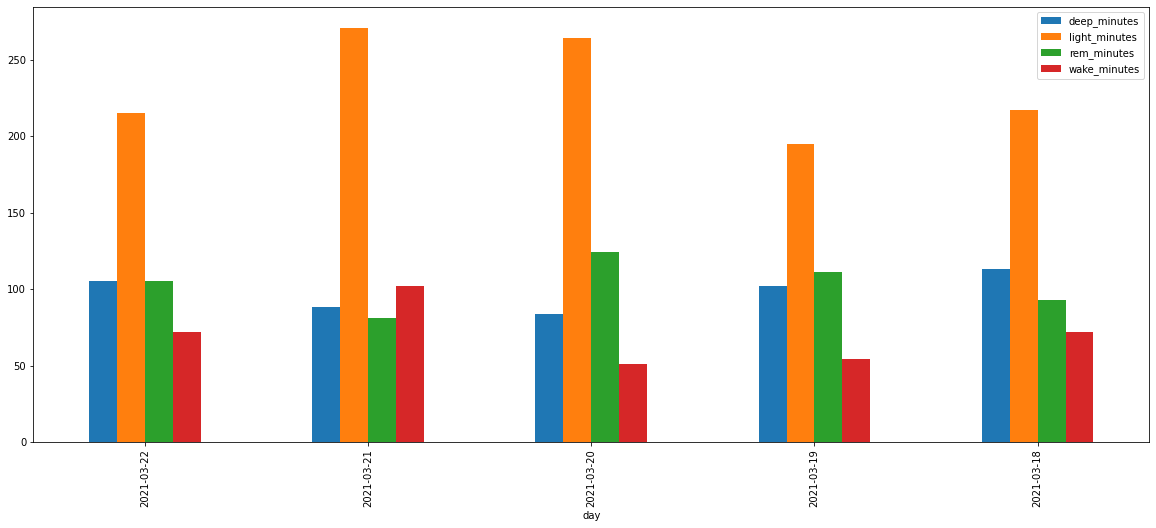

In [80]:
#Plotting data
sleep_df.set_index('day').plot(kind = 'bar')

<h2>Resting heart rate</h2>

In [81]:
header = {'Authorization': 'Bearer {}'.format(access_token)}

response = requests.get("https://api.fitbit.com/1/user/-/activities/heart/date/"+start_date+"/"+end_date+".json", headers=header).json()

In [82]:
all_resting_HR_list = []
for i in response['activities-heart']:
    resting_dict = { 'dateTime':i['dateTime'], "resting_HR":i['value']['restingHeartRate']}
    all_resting_HR_list.append(resting_dict)
    
resting_HR_df = pd.DataFrame(all_resting_HR_list)
resting_HR_df.set_index("dateTime", inplace = True)

D:\installed_programs\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='dateTime'>

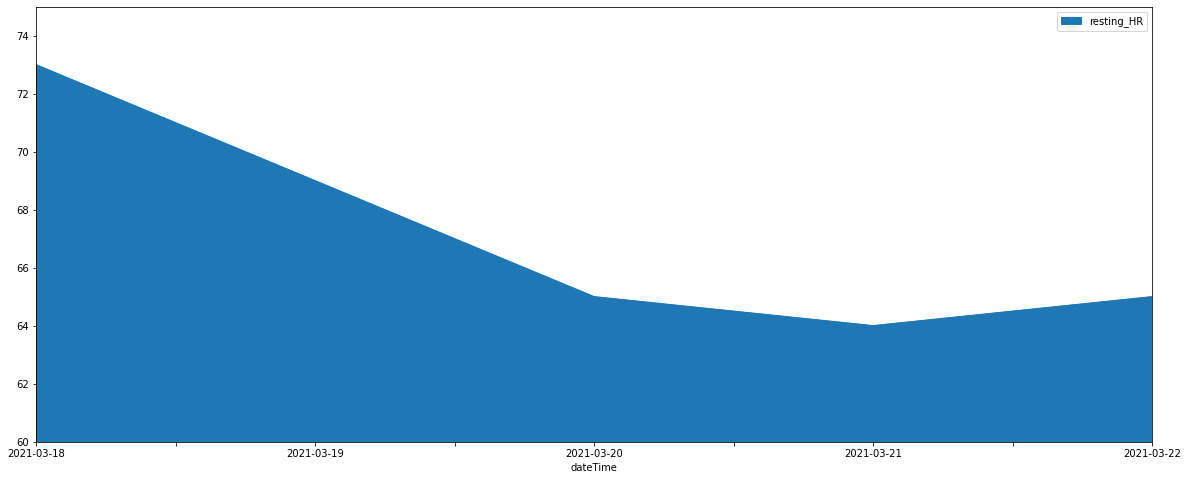

In [83]:
plt.rcParams["figure.figsize"]=20,8
resting_HR_df.plot(kind='area',ylim=(60,75))

<h2>Activity minutes</h2>

In [84]:
header = {'Authorization': 'Bearer {}'.format(access_token)}

response = requests.get("https://api.fitbit.com/1/user/-/activities/tracker/minutesSedentary/date/"+start_date+"/"+end_date+".json", headers=header).json()

minutesSedentary_list = [int(i['value']) for i in response['activities-tracker-minutesSedentary']]

response = requests.get("https://api.fitbit.com/1/user/-/activities/tracker/minutesLightlyActive/date/"+start_date+"/"+end_date+".json", headers=header).json()

minutesLightlyActive_list = [int(i['value']) for i in response['activities-tracker-minutesLightlyActive']]

response = requests.get("https://api.fitbit.com/1/user/-/activities/tracker/minutesFairlyActive/date/"+start_date+"/"+end_date+".json", headers=header).json()

minutesFairlyActive_list = [int(i['value']) for i in response['activities-tracker-minutesFairlyActive']]

response = requests.get("https://api.fitbit.com/1/user/-/activities/tracker/minutesVeryActive/date/"+start_date+"/"+end_date+".json", headers=header).json()

minutesVeryActive_list = [int(i['value']) for i in response['activities-tracker-minutesVeryActive']]

datetime_list = [i['dateTime'] for i in response['activities-tracker-minutesVeryActive']]

<AxesSubplot:>

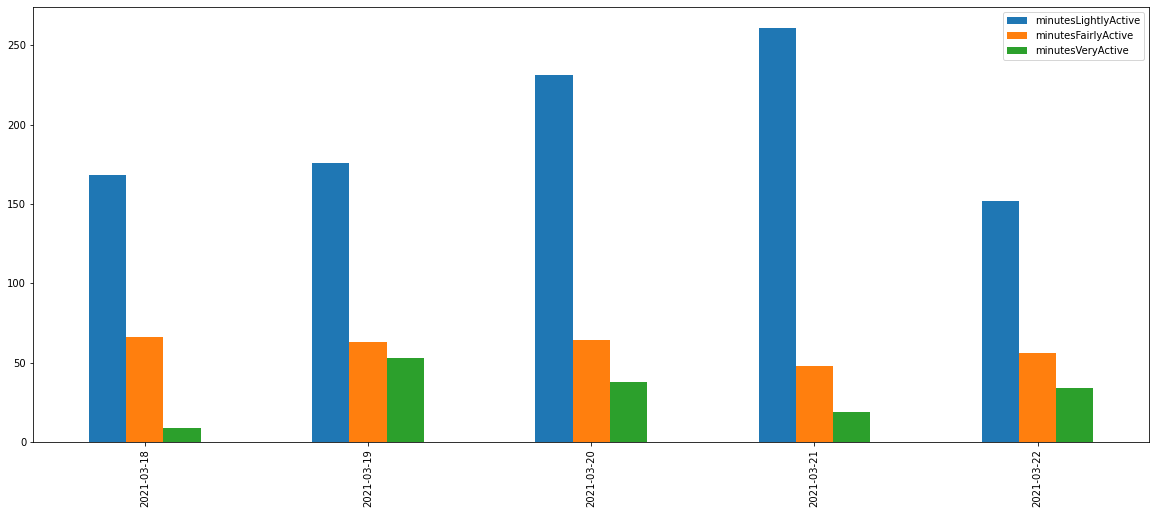

In [87]:
data_activity = {'minutesSedentary':minutesSedentary_list, 'minutesLightlyActive':minutesLightlyActive_list, 'minutesFairlyActive':minutesFairlyActive_list, 'minutesVeryActive':minutesVeryActive_list}
pd.DataFrame(data_activity, index=datetime_list)[['minutesLightlyActive', 'minutesFairlyActive', 'minutesVeryActive']].plot(kind = 'bar')

<h2>Sleeping HR</h2>

In [85]:
sleep_HR_date = "2021-03-26"


In [86]:
splitted_date = sleep_HR_date.split('-')

year = int(splitted_date[0])
month = int(splitted_date[1])
day = int(splitted_date[2])

def parse(date):
    return "{}-{}-{}".format(date[6:], date[:2], date[3:5])

Previous_Date = datetime.datetime(year,month,day) - datetime.timedelta(days=1)
Previous_Date = parse(Previous_Date.strftime('%m/%d/%Y'))

In [137]:
header = {'Authorization': 'Bearer {}'.format(access_token)}

response = requests.get("https://api.fitbit.com/1/user/-/activities/heart/date/"+sleep_HR_date+"/1d/1min/time/00:00/08:00.json", headers=header).json()
response_2 = requests.get("https://api.fitbit.com/1/user/-/activities/heart/date/"+Previous_Date+"/1d/1min/time/22:30/23:59.json", headers=header).json()
prev_response = requests.get("https://api.fitbit.com/1/user/-/activities/heart/date/"+Previous_Date+"/1d.json", headers=header).json()
sleep_response = requests.get("https://api.fitbit.com/1/user/-/sleep/date/"+sleep_HR_date+".json", headers=header).json()

In [138]:
sleep_start_time = sleep_response['sleep'][0]['startTime']
sleep_end_time = sleep_response['sleep'][0]['endTime']

In [139]:
df = pd.DataFrame(response['activities-heart-intraday']['dataset'])
df = df.set_index(pd.to_datetime(sleep_HR_date + ' ' + df['time'].astype(str)))
df2 = pd.DataFrame(response_2['activities-heart-intraday']['dataset'])
df2 = df2.set_index(pd.to_datetime(Previous_Date + ' ' + df2['time'].astype(str)))
del df['time']
del df2['time']
df = df2.append(df)

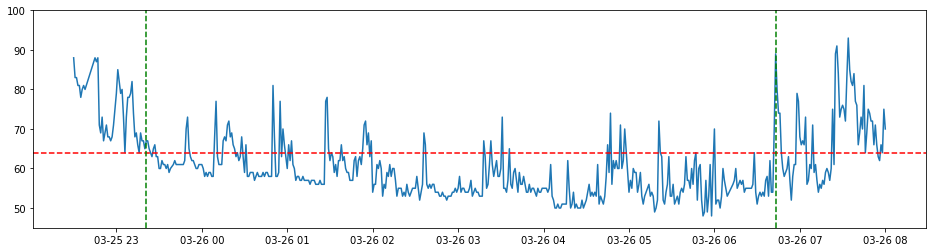

In [140]:
plt.rcParams["figure.figsize"]=16,4
plt.ylim((45,100))
plt.plot(df)
plt.axhline(y = prev_response['activities-heart'][-1]['value']['restingHeartRate'], color = 'r', linestyle = 'dashed')
plt.axvline(x = sleep_start_time, color = 'g', linestyle = 'dashed')
plt.axvline(x = sleep_end_time, color = 'g', linestyle = 'dashed')
